# Chapter 4 Exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import expit as logistic
import arviz as az
import pymc3 as pm
import seaborn as sns
import theano.tensor as tt
np.random.seed(123)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


## Exercise 1
***

In [2]:
iris = pd.read_csv('../code/data/iris.csv')
df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes

varnames = ['α', 'β', 'bd']


In [3]:
for feature in ["sepal_length", "petal_width", "petal_length"]:

    x_n = feature
    x_0 = df[x_n].values
    x_c = x_0 - x_0.mean()

    with pm.Model() as model_0:
        α = pm.Normal('α', mu=0, sd=10)
        β = pm.Normal('β', mu=0, sd=10)

        μ = α + pm.math.dot(x_c, β)    
        θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
        bd = pm.Deterministic('bd', -α/β)

        yl = pm.Bernoulli('yl', p=θ, observed=y_0)

        trace_0 = pm.sample(1000)
        print("Feature {} summary".format(feature))
        print(az.summary(trace_0, varnames, credible_interval=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 1528.82draws/s]


Feature sepal_length summary
    mean    sd  mc error  hpd 2.5%  hpd 97.5%   eff_n  r_hat
α   0.31  0.32      0.00     -0.32       0.96  1731.0    1.0
β   5.40  1.00      0.02      3.55       7.43  1531.0    1.0
bd -0.06  0.06      0.00     -0.17       0.06  1788.0    1.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1063.38draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Feature petal_width summary
     mean    sd  mc error  hpd 2.5%  hpd 97.5%  eff_n  r_hat
α    0.61  1.83      0.06     -2.77       4.65  645.0    1.0
β   18.41  5.61      0.15      8.65      29.26  446.0    1.0
bd  -0.04  0.09      0.00     -0.22       0.13  814.0    1.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:16<00:00, 179.83draws/s]
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
There were 36 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Feature petal_length summary
     mean    sd  mc error  hpd 2.5%  hpd 97.5%  eff_n  r_hat
α    3.37  4.10      0.15     -3.53      12.31  582.0    1.0
β   12.98  5.64      0.08      3.76      23.78  371.0    1.0
bd  -0.28  0.28      0.01     -0.81       0.22  704.0    1.0


From the results we can see that bd variable HPD is the smallest with sepal length, and increases with petal_width, and petal_length.

## Exercise 2
***

In [4]:
for nu in [1,10, 30]:

    x_0 = df["petal_length"].values
    x_c = x_0 - x_0.mean()

    with pm.Model() as model_0:
        # Priors have been changed
        α = pm.StudentT('α', nu=nu, mu=0, sd=10)
        β = pm.StudentT('β', nu=nu, mu=0, sd=10)


        μ = α + pm.math.dot(x_c, β)    
        θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
        bd = pm.Deterministic('bd', -α/β)

        yl = pm.Bernoulli('yl', p=θ, observed=y_0)

        trace_0 = pm.sample(1000)
        print("Feature {} nu {} summary".format(feature, nu))
        print(az.summary(trace_0, varnames, credible_interval=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:20<00:00, 146.47draws/s]
There were 660 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5723934984887481, but should be close to 0.8. Try to increase the number of tuning steps.
There were 172 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


Feature petal_length nu 1 summary
      mean      sd  mc error  hpd 2.5%  hpd 97.5%  eff_n  r_hat
α     4.95   13.41      1.15    -10.62      27.76  126.0   1.00
β   137.73  450.93     81.03      3.59     598.05   41.0   1.03
bd   -0.17    0.25      0.04     -0.73       0.17   49.0   1.01


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:06<00:00, 445.40draws/s]
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
There were 37 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Feature petal_length nu 10 summary
     mean    sd  mc error  hpd 2.5%  hpd 97.5%  eff_n  r_hat
α    4.03  4.56      0.14     -3.52      13.52  434.0    1.0
β   14.50  6.94      0.40      3.71      27.74  334.0    1.0
bd  -0.29  0.28      0.01     -0.83       0.18  543.0    1.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:03<00:00, 763.51draws/s]
There were 55 divergences after tuning. Increase `target_accept` or reparameterize.
There were 48 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Feature petal_length nu 30 summary
     mean    sd  mc error  hpd 2.5%  hpd 97.5%  eff_n  r_hat
α    3.94  4.30      0.20     -2.79      13.68  327.0   1.00
β   14.01  5.98      0.38      4.00      25.55  369.0   1.01
bd  -0.28  0.28      0.01     -0.83       0.19  329.0   1.00


## Exercise 3
***

In [5]:
x_n = "sepal_length"
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_0:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    sd = pm.HalfNormal("sd", sd=1)

    μ = α + pm.math.dot(x_c, β)

    yl = pm.Normal('yl', mu=μ, sd=sd, observed=y_0)
    trace_linear = pm.sample(1000)
    posterior_predictive_linear = pm.sample_posterior_predictive(trace_linear)
    print(az.summary(trace_linear, credible_interval=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, β, α]
100%|██████████| 2000/2000 [00:08<00:00, 231.05it/s]


    mean    sd  mc error  hpd 2.5%  hpd 97.5%   eff_n  r_hat
α   0.50  0.04       0.0      0.43       0.57  3075.0    1.0
β   0.57  0.05       0.0      0.46       0.67  3047.0    1.0
sd  0.35  0.02       0.0      0.30       0.40  2519.0    1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c12be1e10>],
      dtype=object)

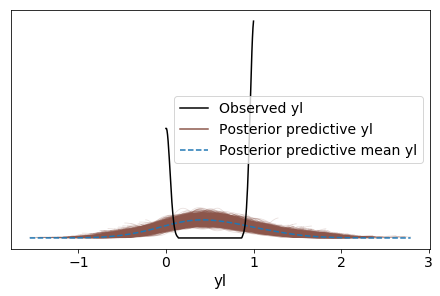

In [6]:
data = az.from_pymc3(trace=trace_linear, posterior_predictive=posterior_predictive_linear)
az.plot_ppc(data)

From the posterior predictive check this model is not very useful. We are trying to estimate the probability of a species given a sepal_length, but a number of the posterior predictive check values are below 0 and above 1. As is such the result cannot be interpreted as probability.

## Exercise 4
***

In [7]:
df = iris.query("species == ('setosa', 'versicolor')") 
y_1 = pd.Categorical(df['species']).codes 
x_n = ['sepal_length', 'sepal_width'] 
x_1 = df[x_n].values

In [8]:
with pm.Model() as model_1: 
    α = pm.Normal('α', mu=0, sd=10) 
    β = pm.Normal('β', mu=0, sd=2, shape=len(x_n)) 
     
    μ = α + pm.math.dot(x_1, β) 
    θ = pm.Deterministic('θ', 1 / (1 + pm.math.exp(-μ))) 
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_1[:,0])
     
    yl = pm.Bernoulli('yl', p=θ, observed=y_1) 
 
    trace_1 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [01:04<00:00, 77.76draws/s] 
The acceptance probability does not match the target. It is 0.8848631965762076, but should be close to 0.8. Try to increase the number of tuning steps.


In [9]:
varnames = ['α', 'β'] 
summary = az.summary(trace_1, var_names=varnames)
summary

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
α,-9.24,4.59,0.11,-17.84,-0.47,1504.0,1.0
β[0],4.71,0.88,0.03,3.03,6.34,1370.0,1.0
β[1],-5.22,1.01,0.02,-7.25,-3.56,1567.0,1.0


In [10]:
x_1 = 4.5  # sepal_length
x_2 = 3   # sepal_width 

log_odds_versicolor_i = (summary['mean'] * [1, x_1, x_2]).sum()
probability_versicolor_i = logistic(log_odds_versicolor_i)


log_odds_versicolor_f = (summary['mean'] * [1, x_1, x_2+1]).sum()
probability_versicolor_f = logistic(log_odds_versicolor_f)

log_odds_versicolor_f - log_odds_versicolor_i, probability_versicolor_f - probability_versicolor_i

(-5.219999999999999, -0.02387657278569843)

The value of -5.19 is consistent across the summary and our "hand check". A log odds value of -5.1 means that as $\beta_1$ increases, the probability that the species is versicolor decreases, or equivalently as sepal_width increases, the probability the flower is versicolor decreases.

We can verify with a quick plot

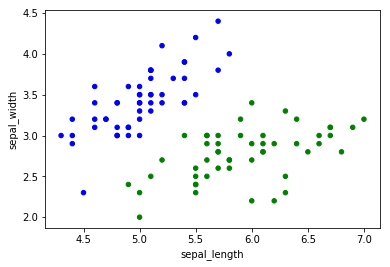

In [11]:
colors = df["species"].replace({'setosa':"blue", 'versicolor':"green"})
df.plot(kind="scatter", x="sepal_length", y="sepal_width", c=colors)

As sepal with increases from 3 to 4 we get farther from the green dots, reducing the probability that the flower were seeing is of the virginica species.

# Question 5
***

In [12]:
# Values for sepal length are directly added in the log_odds_line
x_1 = 4.5  # sepal_length
x_2 = 3   # sepal_width 

for i in (0,1):
    log_odds_versicolor_i = (summary['mean'] * [1, x_1+i, x_2]).sum()
    probability_versicolor_i = logistic(log_odds_versicolor_i)


    log_odds_versicolor_f = (summary['mean'] * [1, x_1+i+1, x_2]).sum()
    probability_versicolor_f = logistic(log_odds_versicolor_f)

    print(f"""sepal_length_i {x_1+i}, sepal_length_f {x_1+i+1}
    Log Odds Change {log_odds_versicolor_f - log_odds_versicolor_i}
    Probability Change {probability_versicolor_f - probability_versicolor_i}
    """)

sepal_length_i 4.5, sepal_length_f 5.5
    Log Odds Change 4.709999999999999
    Probability Change 0.7080309252764029
    
sepal_length_i 5.5, sepal_length_f 6.5
    Log Odds Change 4.710000000000001
    Probability Change 0.26467417655124303
    


From from the calculation above we see that while the coefficient stays constant, as it should in linear regression, the probability change is not as large from 5.5 to 6.5 as it is from 4.5 to 5.5. Looking at the graphic this intuitively makes sense as well. In the region of sepal length of 4.5 to 5.5, it's hard to differentiate among the species. However when moving from a sepal length of 5.5 to 6.5, only the virginica species has sepal lengths in that range.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as az
import pymc3 as pm
import seaborn as sns
import theano.tensor as tt
np.random.seed(123)

## Exercise 6
***

In [14]:
iris = pd.read_csv('../code/data/iris.csv')

df = iris.query("species == ('setosa', 'versicolor')") 
df = df[22:78]  
y_3 = pd.Categorical(df['species']).codes 
x_n = ['sepal_length', 'sepal_width'] 
x_3 = df[x_n].values

varnames = ['α', 'β'] 

In [15]:
with pm.Model() as model_3: 
    α = pm.Normal('α', mu=0, sd=10) 
    β = pm.Normal('β', mu=0, sd=2, shape=len(x_n)) 
     
    μ = α + pm.math.dot(x_3, β) 
    θ = 1 / (1 + pm.math.exp(-μ)) 
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_3[:,0]) 
     
    yl = pm.Bernoulli('yl', p=θ, observed=y_3) 
 
    trace_3 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:12<00:00, 234.31draws/s]
The acceptance probability does not match the target. It is 0.8827315277894231, but should be close to 0.8. Try to increase the number of tuning steps.


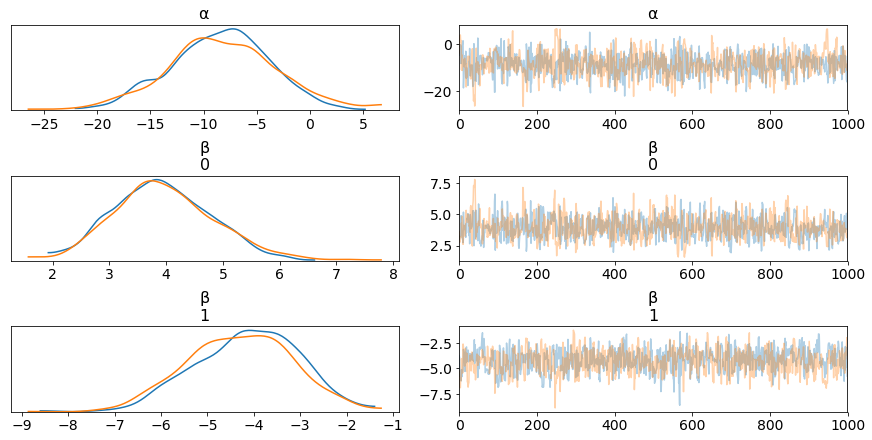

In [16]:
az.plot_trace(trace_3, varnames);

/Users/canyon/.miniconda3/envs/bap/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


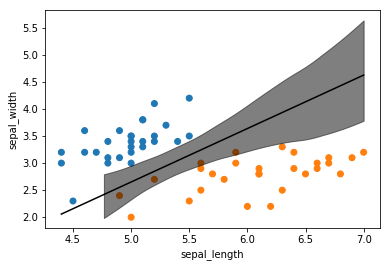

In [17]:
idx = np.argsort(x_3[:,0]) 
bd = trace_3['bd'].mean(0)[idx] 
plt.scatter(x_3[:,0], x_3[:,1], c= [f'C{x}' for x in y_3]) 
plt.plot(x_3[:,0][idx], bd, color='k')

az.plot_hpd(x_3[:,0], trace_3['bd'], color='k')

plt.xlabel(x_n[0]) 
plt.ylabel(x_n[1]);

The decision boundary in this plot looks more like the unfiltered dataset as the blue datapoints are largely not contained in the 95% HPD. This indicates that the balanced model, even with less data points, is better able to distinguish between classes.

## Exercise 7
***

Lets run the model to have data points for a discussion

In [18]:
iris = sns.load_dataset('iris')
y_s = pd.Categorical(iris['species']).codes
x_n = iris.columns[:-1]
x_s = iris[x_n].values
x_s = (x_s - x_s.mean(axis=0)) / x_s.std(axis=0)

with pm.Model() as model_s:
    α = pm.Normal('α', mu=0, sd=5, shape=3)
    β = pm.Normal('β', mu=0, sd=5, shape=(4,3))
    μ = pm.Deterministic('μ', α + pm.math.dot(x_s, β))
    
    θ = tt.nnet.softmax(μ)
    yl = pm.Categorical('yl', p=θ, observed=y_s)
    
    trace_s = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:38<00:00, 129.38draws/s]


In [19]:
print(trace_s['μ'].shape)
print(trace_s['μ'][:,0,0].mean())

(4000, 150, 3)
20.50240089583297


In [20]:
data_pred = trace_s['μ'].mean(0)
data_pred[:5]

array([[ 20.5024009 ,   6.48490714, -27.0838455 ],
       [ 17.39770936,   7.02248623, -24.56869099],
       [ 19.88486309,   6.2033202 , -26.23990539],
       [ 18.74471434,   5.99731255, -24.90962857],
       [ 21.56848135,   6.03376081, -27.70047043]])

#### Conceptual Understanding
Note that the shape of the trace. The dimensions should read as follows. We have 4000 estimations of the 3 softmax class values for each of the 150 rows in the dataset.

#### Discussion
If we changed a softmax model to a linear model regression model a couple things would change. First would be the interpretation of the final output. A softmax prediction estimates the probability of each class, whereas a linear regression would just provide one number as an estimate for the class. The other problem is that a liner regression would output a continous value across all real numbers, and how to define when one class starts and another ends is unclear.

## Exercise 8
***

In [21]:
iris = pd.read_csv('../code/data/iris.csv')
df = iris.query("species == ('setosa', 'versicolor')") 
y_3 = pd.Categorical(df['species']).codes 
x_n = 'sepal_length'
x_3 = df[x_n].values

Logistic Regression model (Discriminative)

In [22]:
with pm.Model() as logistic_model:
    α = pm.Normal("α", mu=0, sd=10)
    β = pm.Normal("β", mu=0, sd=10)
    μ =  α + pm.math.dot(x_3, β)
    
    θ = pm.Deterministic("θ", pm.math.sigmoid(μ))
    bd = pm.Deterministic("bd", -α / β )
    
    y1= pm.Bernoulli("y1", p=θ, observed = y_3)
    trace_logistic = pm.sample(size=2000)
    ppc_logistic = pm.sample_posterior_predictive(trace_logistic)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:06<00:00, 294.01draws/s]
The acceptance probability does not match the target. It is 0.8789549883136204, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
100%|██████████| 1000/1000 [00:00<00:00, 1496.42it/s]


Linear Discriminantive Analysis (Generative)

In [23]:
with pm.Model() as lda_model:
    σ = pm.HalfNormal("σ", sd=10)
    μ = pm.Normal("μ", mu=0, sd=10, shape=2)
    
    setosa = pm.Normal('setosa', mu=μ[0], sd=σ, observed=x_3[:50])
    versicolor = pm.Normal("versicolor", mu=μ[1], sd=σ, observed=x_3[50:])
    bd = pm.Deterministic('bd', (μ[0] + μ[1]) / 2)
    
    trace_lda = pm.sample(1000)
    ppc_lda = pm.sample_posterior_predictive(trace_lda)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [μ, σ]
100%|██████████| 2000/2000 [00:02<00:00, 690.10it/s]


The likelihood of the logisitic regression model is as follows

$$ y \text{~} Bernoulli(\theta) $$

and the likelihood of the Linear Discriminative Analysis are

\begin{eqnarray}
Versicolor_{sepal\_length} \text{~} Normal(\mu_0, \sigma) \newline
Setosa_{sepal\_length} \text{~} Normal(\mu_1, \sigma)
\end{eqnarray}

In the logistic regression we are not estimating the properties of the sepal length. Were are merely fitting parameters of the inverse link function. In the LDA model we are estimating the sepal length distributions directly.

In [24]:
ppc_logistic["y1"][0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [25]:
ppc_lda["setosa"][0]

array([4.71463742, 5.2633057 , 5.66994339, 4.74420479, 4.97843912,
       4.59356307, 5.41372777, 5.1948831 , 5.51272629, 5.65950584,
       5.34797407, 4.81645109, 4.6305482 , 5.10271236, 5.5889113 ,
       4.71827993, 4.83493674, 4.6542698 , 5.89017529, 5.6038601 ,
       4.99205586, 4.90430571, 5.82113775, 4.15780041, 5.15483953,
       5.28250306, 5.45034827, 4.19522219, 4.9574948 , 5.34120141,
       5.11277663, 3.93030624, 4.61368232, 5.77334718, 5.78237378,
       4.36235657, 5.2645774 , 5.89794163, 4.86338468, 4.65467142,
       5.19393483, 4.49732507, 4.96292416, 4.2146363 , 5.46463465,
       4.9720281 , 4.7953429 , 5.07491514, 4.50461571, 3.90481014])

When comparing the posterior predictive it can be seen that the logistic model is binary, estimating either 0 or 1, versus the LDA model which has real numbers that generally look like sepal lengths. This follows our understandings of the models, the discriminative model can only make predictions as to which class a particular sepal length belongs to, whereas the LDA model can make predictions about the sepal lengths directly.

## Exercise 9
***

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β_person, α_person, β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:13<00:00, 221.50draws/s]


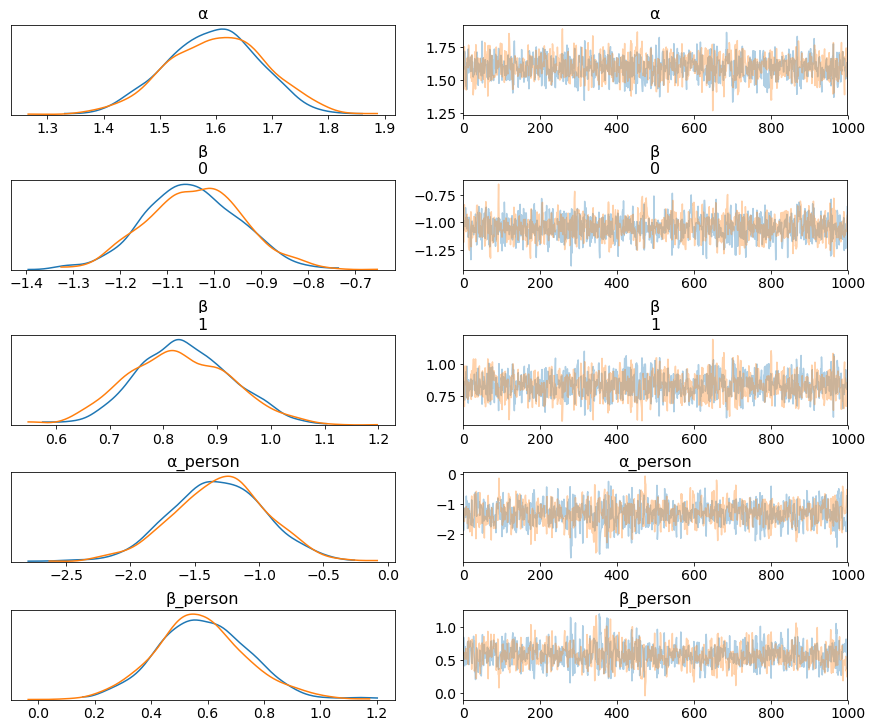

In [26]:
fish_data = pd.read_csv('../code/data/fish.csv')

with pm.Model() as ZIP_reg:
    # ψ = pm.Beta('ψ', 1, 1)
    α = pm.Normal('α', 0, 10)
    β = pm.Normal('β', 0, 10, shape=2)
    
    θ = pm.math.exp(α + β[0] * fish_data['child'] + β[1] * fish_data['camper'])
    
    α_person = pm.Normal('α_person', 0, 10)
    β_person = pm.Normal('β_person', 0, 10)
    ψ = pm.math.sigmoid(α_person + β_person * fish_data['persons'])
    
    yl = pm.ZeroInflatedPoisson('yl', ψ, θ, observed=fish_data['count'])
    
    trace_ZIP_reg = pm.sample(1000)
    
az.plot_trace(trace_ZIP_reg);

## Exercise 10
***

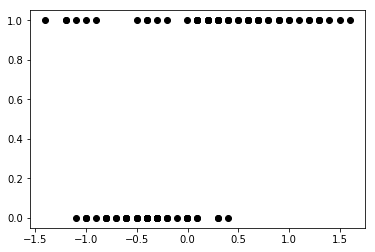

In [27]:
iris = sns.load_dataset("iris") 
df = iris.query("species == ('setosa', 'versicolor')") 
y_0 = pd.Categorical(df['species']).codes 
x_n = 'sepal_length'  
x_0 = df[x_n].values 
y_0 = np.concatenate((y_0, np.ones(6, dtype=int))) 
x_0 = np.concatenate((x_0, [4.2, 4.5, 4.0, 4.3, 4.2, 4.4])) 
x_c = x_0 - x_0.mean() 
plt.plot(x_c, y_0, 'o', color='k');

Let's take the robust logistic regression from the chapter and make it non robust

In [28]:
with pm.Model() as non_rlg:
    α = pm.Normal("α", mu=0, sd=10)
    β = pm.Normal("β", mu=0, sd=10)
    μ = α + β * x_c
    
    θ = pm.Deterministic("θ", pm.math.sigmoid(μ))
    bd = pm.Deterministic("bd", -α/β)
    
    π = pm.Beta("π",1,1)
    
    # Short Circuit Robust regression 
    # p = π *.5 + (1-π)*θ
    p = θ
    
    y = pm.Bernoulli("y", p=p, observed=y_0)
    
    trace_rlg = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [π, β, α]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1202.17draws/s]


In [29]:
varnames = ['α', 'β', 'bd']
az.summary(trace_rlg, varnames)

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
α,0.24,0.24,0.0,-0.16,0.73,2186.0,1.0
β,2.40,0.50,0.0,1.52,3.35,1747.0,1.0
bd,-0.10,0.11,0.0,-0.31,0.09,2474.0,1.0


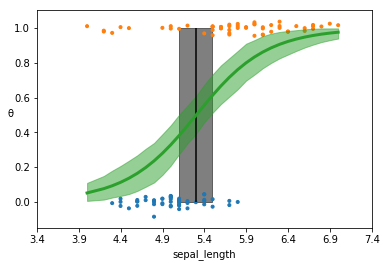

In [30]:
theta = trace_rlg['θ'].mean(axis=0)
idx = np.argsort(x_c)
plt.plot(x_c[idx], theta[idx], color='C2', lw=3);
plt.vlines(trace_rlg['bd'].mean(), 0, 1, color='k')
bd_hpd = az.hpd(trace_rlg['bd'])

plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)

plt.scatter(x_c, np.random.normal(y_0, 0.02), marker='.', color=[f'C{x}' for x in y_0])
theta_hpd = az.hpd(trace_rlg['θ'])[idx]
plt.fill_between(x_c[idx], theta_hpd[:,0], theta_hpd[:,1], color='C2', alpha=0.5)

plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)

# use original scale for xticks
locs, _ = plt.xticks() 
plt.xticks(locs, np.round(locs + x_0.mean(), 1))
plt.savefig('B11197_04_13.png', dpi=300);

Compare this plot to figure 4.13. Note that the HPD for the decision boundary is wider, reflecting the additional uncertainty. This is also reflected in the slope which is more gradual. This is reflected both in the plot, but also the beta parameter (15.77 for robust model versus 2.38 for the non robust model)